<a href="https://colab.research.google.com/github/mjaliz/tfztm/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural netwoks for classification problems.

A classification problem is where you try to classify as one thing or another thing.

A few types of classification problems:
* Binary classification
* Muliticlass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


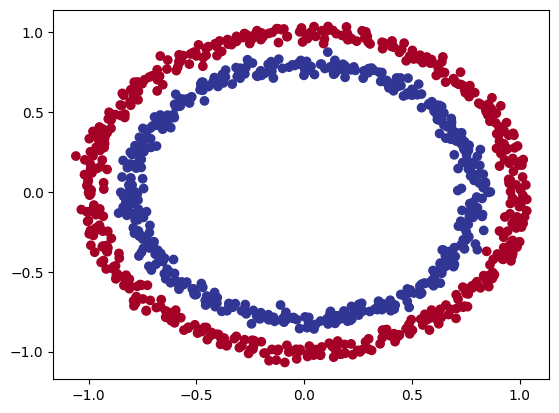

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [12]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 6ms/step - loss: 6.9941 - accuracy: 0.5190
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000


In [13]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing. So let's step thins up a notch and add and extra layer.

In [14]:
# Set the rando seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [19]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improve our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer epochs)

In [22]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [24]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 1s 8ms/step - loss: 0.6967 - accuracy: 0.5130


[0.69667649269104, 0.5130000114440918]

To visualize our model's predictions, let's crate a function `plot_decision_boundry`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [28]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model prediction on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them reaady for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpah=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


<ipython-input-28-de8f9c9a0287>:31: UserWarning: The following kwargs were not used by contour: 'alpah'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpah=0.7)


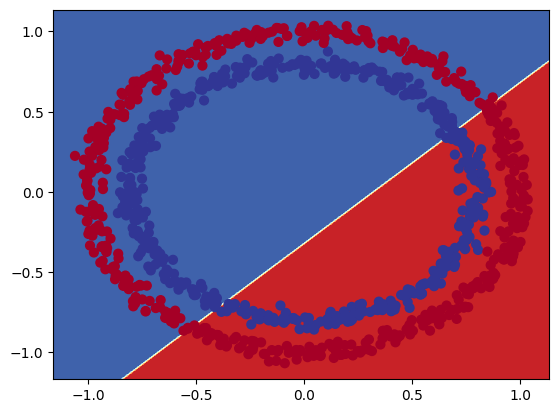

In [29]:
# Check out the predictions our model is making
plot_decision_boundary(model_3,
                       X,
                       y)